# **Penelisation & KNN - outcome_damage**

# 0. Loading packages and dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('train_V2_cleaned.csv', index_col=[0])

# 1. Take a look at the data

In [2]:
df.shape

(4912, 57)

In [3]:
df.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,client_segment_2.0,client_segment_3.0,client_segment_4.0,client_segment_5.0,sect_empl_0.0,sect_empl_1.0,sect_empl_2.0,sect_empl_3.0,sect_empl_4.0,sect_empl_6.0
1090,-0.916414,-1.142158,-0.137953,-0.409033,-0.452286,0.802621,4.804002,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4542,-0.889399,-1.142158,-0.549632,-0.409033,-0.452286,-1.094296,-0.208160,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3439,1.232655,1.430057,1.367869,-0.409033,-0.452286,-1.094296,-0.208160,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3122,0.915028,0.778278,1.164925,-0.409033,-0.452286,0.870758,-0.208160,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
129,1.601833,1.264973,-0.397645,-0.409033,-0.452286,0.839130,-0.208160,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912 entries, 1090 to 1304
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income_am              4912 non-null   float64
 1   profit_last_am         4912 non-null   float64
 2   profit_am              4912 non-null   float64
 3   damage_am              4912 non-null   float64
 4   damage_inc             4912 non-null   float64
 5   crd_lim_rec            4912 non-null   float64
 6   credit_use_ic          4912 non-null   float64
 7   gluten_ic              4912 non-null   float64
 8   lactose_ic             4912 non-null   float64
 9   insurance_ic           4912 non-null   float64
 10  spa_ic                 4912 non-null   float64
 11  empl_ic                4912 non-null   float64
 12  cab_requests           4912 non-null   float64
 13  married_cd             4912 non-null   float64
 14  bar_no                 4912 non-null   float64
 15  s

In [5]:
df.iloc[:,25:39] = df.iloc[:,25:39].astype(np.uint8)

# 2 Train/test-split and standardisation

In [6]:
from sklearn.model_selection import train_test_split
from random import Random

damagers = df[df['outcome_damage_inc'] == 1]

X = damagers.drop(['outcome_profit', 'outcome_damage_amount', 'outcome_damage_inc'], 1)
y_damage = damagers['outcome_damage_amount']



X_train_damage, X_test_damage, y_train_damage, y_test_damage = train_test_split(X, y_damage, test_size=0.2, random_state=123)

__note__: Standardization already happened in pre-processing

# 3. Nearest neighbors
## 3.1. Radius Neighbors Regression

1. Crossvalidation from 5 to 10.

In [7]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score

Radius = np.linspace(5,10,5)
cv_scores = []
sd_scores = []

for k in Radius:
    Rnn = RadiusNeighborsRegressor(radius= k)
    scores = cross_val_score(Rnn, X_train_damage, y_train_damage,  cv=3)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

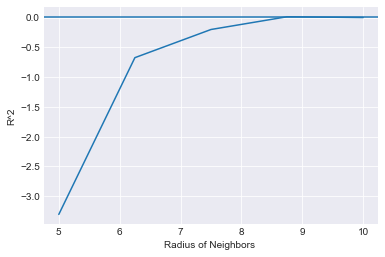

In [8]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(Radius, cv_scores)
plt.xlabel('Radius of Neighbors ')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()

## 3.2 K-nearest Neighbors

1. Cross-validation

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

K = np.arange(1,65)    
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for k in K:
    knn = KNeighborsRegressor(n_neighbors= k)
    scores = cross_val_score(knn, X_train_damage, y_train_damage, cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

2. plots

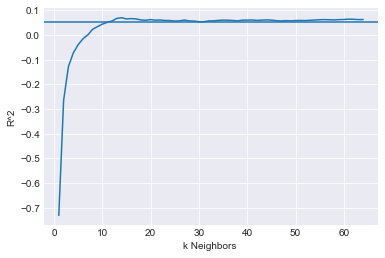

The best k is 14


In [10]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(K, cv_scores)
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()
print('The best k is', K[max_index])

this plot is hard to read, so i focus on 10 => 65

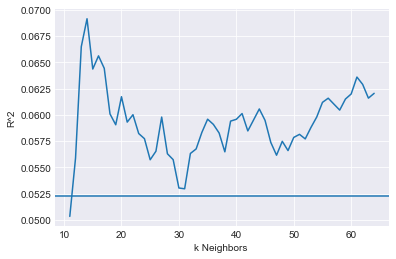

The best k is 14


In [23]:
plt.plot(K[10 : 65],cv_scores[10 :65])
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')

plt.axhline(y=max_value-1.96*sd_scores[max_index])


plt.show()
print('The best k is', K[max_index])

14 is a big number of neighbors, so we won't increase it, as it will lead to a underfitted model.

3. Retrain

In [25]:
knn = KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train_damage, y_train_damage)  
print('train value for k=64:', knn.score(X_train_damage, y_train_damage) )


train value for k=64: 0.17184197800874468


# 4. Penalisation

1. Design polynomial features

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_damage)
X_train_poly.shape

(1008, 1540)

2. Lasso-penalisation

In [27]:
from sklearn import linear_model
linreg_lasso1 = linear_model.Lasso()
linreg_lasso1.fit(X_train_poly, y_train_damage)
print('R2: %.3f' % linreg_lasso1.score(X_train_poly, y_train_damage))

R2: 0.097


This is too low! Probably because of underfit!

In [28]:
linreg_lasso1.coef_

array([ 0.,  0.,  0., ..., -0.,  0.,  0.])

All coefficients are shrunken down to 0. Offcourse our model is underfitted. We do a cross-validation to find the best alpha.

3. Cross-validation

In [29]:
from sklearn.linear_model import LassoCV
linreg_lassoCV = LassoCV(cv=3, random_state=123, max_iter=10000).fit(X_train_poly, y_train_damage)
print('R2 : %.3f' % linreg_lassoCV.score(X_train_poly, y_train_damage))

R2 : 0.040


This is not better

In [30]:
linreg_lassoCV.alpha_

3.73088309099251

In [31]:
print(linreg_lassoCV.score(X_train_poly, y_train_damage))

0.039901177464893856
